## <b> Import modules and ignore warnings

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from scipy.stats import fisher_exact
from statsmodels.stats.multitest import fdrcorrection
import warnings
warnings.filterwarnings("ignore")

## <b> Load and read amr data

In [2]:
vfdb = pd.read_csv('/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/other_geneticcoordinates/vfdb_summary.csv', sep = '\t')
print("Shape of the dataframe is", vfdb.shape)

print('-------------------------------------------')
print(vfdb.columns)
print('-------------------------------------------')
vfdb.head()

Shape of the dataframe is (950, 328)
-------------------------------------------
Index(['#FILE', 'NUM_FOUND', 'Unnamed: 2', 'AAA92657', 'AAC38364', 'C_RS05810',
       'KP1_RS17280', 'KP1_RS17295', 'KP1_RS17300', 'KP1_RS17305',
       ...
       'yagZ/ecpA', 'ybtA', 'ybtE', 'ybtP', 'ybtQ', 'ybtS', 'ybtT', 'ybtU',
       'ybtX', 'ykgK/ecpR'],
      dtype='object', length=328)
-------------------------------------------


,#FILE,NUM_FOUND,Unnamed: 2,AAA92657,AAC38364,C_RS05810,KP1_RS17280,KP1_RS17295,KP1_RS17300,KP1_RS17305,...,yagZ/ecpA,ybtA,ybtE,ybtP,ybtQ,ybtS,ybtT,ybtU,ybtX,ykgK/ecpR
0,/home/nasls/ANU/phd_project/TA-SYSTEMS/TA_syst...,60,NaN,.,.,.,.,.,.,.,...,100.00,.,.,.,.,.,.,.,.,100.00
1,/home/nasls/ANU/phd_project/TA-SYSTEMS/TA_syst...,53,NaN,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
2,/home/nasls/ANU/phd_project/TA-SYSTEMS/TA_syst...,60,NaN,.,.,.,.,.,.,.,...,100.00,.,.,.,.,.,.,.,.,100.00
3,/home/nasls/ANU/phd_project/TA-SYSTEMS/TA_syst...,60,NaN,.,.,.,.,.,.,.,...,100.00,.,.,.,.,.,.,.,.,100.00
4,/home/nasls/ANU/phd_project/TA-SYSTEMS/TA_syst...,51,NaN,.,.,.,.,.,.,.,...,100.00,.,.,.,.,.,.,.,.,100.00


In [3]:
def clean_vfdb_summary(df):
    df.drop("Unnamed: 2",axis=1,inplace=True)
    cols=list(df.columns)
    del cols[:2]
    
    for i in cols:
        df[i]=df[i].astype(str)
        df[i]=df[i].apply(lambda x: '1' if re.search(r'\d+\.\d+', x) else '0' )
        df[i]=df[i].astype(float)
    
    df.rename(columns={'#FILE': 'Strain', 'NUM_FOUND': 'GENES_FOUND'}, inplace=True)
    df['Strain'] = df['Strain'].str.replace(r'\.tab', '') 
    df['Strain'] = df['Strain'].str.replace(r'/home/nasls/ANU/phd_project/TA-SYSTEMS/TA_systems_clean/set1/other_geneticcoordinates/vfdb/', '')

In [4]:
clean_vfdb_summary(vfdb)

In [5]:
#amr = amr.set_index('Strain')
vfdb  = vfdb.drop(['GENES_FOUND'], axis  = 1)

In [6]:
vfdb.head()

,Strain,AAA92657,AAC38364,C_RS05810,KP1_RS17280,KP1_RS17295,KP1_RS17300,KP1_RS17305,KP1_RS17340,KP1_RS17345,...,yagZ/ecpA,ybtA,ybtE,ybtP,ybtQ,ybtS,ybtT,ybtU,ybtX,ykgK/ecpR
0,ST000100002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,ST000100003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ST000100090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,ST000100092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,ST000100113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## <b> Load and read toxin data

In [7]:
toxin = pd.read_csv('hits.csv')
print("Shape of the toxin dataframe is", toxin.shape)
print('-------------------------------------------')
print(toxin.columns)
print('-------------------------------------------')
toxin.head()

Shape of the toxin dataframe is (950, 170)
-------------------------------------------
Index(['Strain', '1H-CbtA_toxin', '2H-Cpta_toxin', '3H-Polyketide_cyc2',
       '4H-Fic', '5H-GNAT_acetyltran', '6H-GNAT_acetyltran', '7H-GnsAB_toxin',
       '8H-Toxin_YhaV', '9H-YdaT_toxin',
       ...
       '160H-Zeta_toxin', '161H-CbtA_toxin', '162H-Couple_hipA', '163H-ANT',
       '164H-Zeta_toxin', '165H-HipA_C', '166H-Gp49', '167H-DUF4258',
       '168H-PIN', '169H-PemK_toxin'],
      dtype='object', length=170)
-------------------------------------------


,Strain,1H-CbtA_toxin,2H-Cpta_toxin,3H-Polyketide_cyc2,4H-Fic,5H-GNAT_acetyltran,6H-GNAT_acetyltran,7H-GnsAB_toxin,8H-Toxin_YhaV,9H-YdaT_toxin,...,160H-Zeta_toxin,161H-CbtA_toxin,162H-Couple_hipA,163H-ANT,164H-Zeta_toxin,165H-HipA_C,166H-Gp49,167H-DUF4258,168H-PIN,169H-PemK_toxin
0,ST001670050,2,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,ST006480109,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,ST000730234,2,1,1,1,1,1,1,1,3,...,0,0,0,0,0,0,0,0,0,0
3,ST000580141,0,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,ST000380050,2,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [8]:
toxin.head()

,Strain,1H-CbtA_toxin,2H-Cpta_toxin,3H-Polyketide_cyc2,4H-Fic,5H-GNAT_acetyltran,6H-GNAT_acetyltran,7H-GnsAB_toxin,8H-Toxin_YhaV,9H-YdaT_toxin,...,160H-Zeta_toxin,161H-CbtA_toxin,162H-Couple_hipA,163H-ANT,164H-Zeta_toxin,165H-HipA_C,166H-Gp49,167H-DUF4258,168H-PIN,169H-PemK_toxin
0,ST001670050,2,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,ST006480109,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,ST000730234,2,1,1,1,1,1,1,1,3,...,0,0,0,0,0,0,0,0,0,0
3,ST000580141,0,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,ST000380050,2,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [9]:
vfdb = vfdb.set_index('Strain')
vfdb.head()

,AAA92657,AAC38364,C_RS05810,KP1_RS17280,KP1_RS17295,KP1_RS17300,KP1_RS17305,KP1_RS17340,KP1_RS17345,KP1_RS17355,...,yagZ/ecpA,ybtA,ybtE,ybtP,ybtQ,ybtS,ybtT,ybtU,ybtX,ykgK/ecpR
Strain,,,,,,,,,,,,,,,,,,,,,
ST000100002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
ST000100003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ST000100090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
ST000100092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
ST000100113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [10]:
merged_df = pd.merge(vfdb, toxin, on='Strain', how = 'left' )

In [11]:
print(merged_df.shape)
merged_df.head()

(950, 495)


,Strain,AAA92657,AAC38364,C_RS05810,KP1_RS17280,KP1_RS17295,KP1_RS17300,KP1_RS17305,KP1_RS17340,KP1_RS17345,...,160H-Zeta_toxin,161H-CbtA_toxin,162H-Couple_hipA,163H-ANT,164H-Zeta_toxin,165H-HipA_C,166H-Gp49,167H-DUF4258,168H-PIN,169H-PemK_toxin
0,ST000100002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,ST000100003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,ST000100090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,ST000100092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,ST000100113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
toxin = toxin.set_index('Strain')

In [13]:
# set the significance level
alpha = 0.01

# create a dictionary to store the co-occurring AMR genes for each toxin gene
co_occurrence_dict = {}

In [14]:
# iterate through each toxin gene
for toxin_gene in toxin.columns:
    # create a list to store the co-occurring AMR genes for this toxin gene
    co_vf_genes = []
    # count the number of strains that have the toxin gene
    toxin_count = (toxin[toxin_gene] == 1).sum()
    
    # iterate through each AMR gene
    for vf_gene in vfdb.columns:
        # count the number of strains that have both the AMR gene and the toxin gene
        co_count = ((merged_df[vf_gene] == 1) & (merged_df[toxin_gene] == 1)).sum()
        
        # perform Fisher's exact test to calculate the p-value
        # for the hypothesis that the occurrence of the AMR gene is greater in strains with the toxin gene
        p_value = fisher_exact([[co_count, toxin_count - co_count], [(vfdb[vf_gene] == 1).sum() - co_count, ((merged_df[vf_gene] != 1) & (merged_df[toxin_gene] == 1)).sum()]], alternative='greater')[1]
        
        # adjust the p-value for multiple testing using the false discovery rate (FDR) method
        p_value_adj = fdrcorrection([p_value], alpha=alpha)[1][0]
        
        # if the adjusted p-value is significant, add the AMR gene to the list for this toxin gene
        if p_value_adj < alpha:
            co_vf_genes.append(vf_gene)
    
    # store the list of co-occurring AMR genes in the dictionary
    co_occurrence_dict[toxin_gene] = co_vf_genes


In [15]:
# Create an empty dataframe with columns for toxins and AMR genes
df = pd.DataFrame(columns=['toxins', 'virulence genes'])

# Loop through each key-value pair in your dictionary
for toxin, amr_genes in co_occurrence_dict.items():
    # Create a new row with the toxin in the first column and a list of AMR genes in the second column
    new_row = {'toxins': toxin, 'virulence genes': amr_genes}
    # Add the new row to the dataframe
    df = df.append(new_row, ignore_index=True)
    
# Display the resulting dataframe
df.head()


,toxins,virulence genes
0,1H-CbtA_toxin,"[AAC38364, cesAB, cesD, cesD2, cesF, cesL, ces..."
1,2H-Cpta_toxin,"[AAA92657, AAC38364, C_RS05810, KP1_RS17280, K..."
2,3H-Polyketide_cyc2,"[AAA92657, AAC38364, C_RS05810, KP1_RS17280, K..."
3,4H-Fic,"[AAA92657, AAC38364, C_RS05810, KP1_RS17280, K..."
4,5H-GNAT_acetyltran,"[AAA92657, AAC38364, C_RS05810, KP1_RS17280, K..."


In [16]:
df['Count_virulence_genes'] = [len(c) for c in df['virulence genes']]

In [17]:
df.to_csv('cooccur_vfdb', index = None)

In [19]:
df.head()

,toxins,virulence genes,Count_virulence_genes
0,1H-CbtA_toxin,"[AAC38364, cesAB, cesD, cesD2, cesF, cesL, ces...",85
1,2H-Cpta_toxin,"[AAA92657, AAC38364, C_RS05810, KP1_RS17280, K...",304
2,3H-Polyketide_cyc2,"[AAA92657, AAC38364, C_RS05810, KP1_RS17280, K...",304
3,4H-Fic,"[AAA92657, AAC38364, C_RS05810, KP1_RS17280, K...",304
4,5H-GNAT_acetyltran,"[AAA92657, AAC38364, C_RS05810, KP1_RS17280, K...",291


In [21]:
# Assuming your dataframe is named 'df'
unique_gene = None

for index, row in df.iterrows():
    current_gene_set = set(row[1])  # Assuming column 2 is the second column
    print(current_gene_set)
    #other_gene_sets = set().union(*[set(gene_list) for gene_list in df.iloc[:, 1].values if gene_list != row[1]])
    
    #if current_gene_set - other_gene_sets == current_gene_set:
        #unique_gene = row[1]
        #break

#print("Unique gene:", unique_gene)

{'rorf1', 'cesD', 'espA', 'nleD', 'espP', 'espG', 'nleG-3', 'sepZ/espZ', 'nleC', 'espO1-2', 'cesD2', 'nleG6-1', 'etgA', 'espW', 'toxB', 'stx2B', 'espL2', 'escG', 'nleG8-2', 'nleG5-1', 'eae', 'escJ', 'stx2A', 'stx1A', 'escI', 'espJ', 'escR', 'espFu/tccP', 'espX6', 'espH', 'nleA/espI', 'espR3', 'nleG2-3', 'espF', 'escN', 'nleB1', 'espM2', 'tccP2', 'paa', 'sepL', 'espX7/nleL', 'sepQ/escQ', 'escC', 'nleG2-4', 'nleG6-2', 'escU', 'escF', 'escP', 'escE', 'escL', 'nleE', 'AAC38364', 'glrR', 'cesL', 'espM1', 'espB', 'cesAB', 'nleG5-2', 'escK', 'espK', 'espY5', 'nleB2', 'espD', 'cesT', 'map', 'tir', 'nleG7', 'stcE', 'escO', 'espO1-1', 'escV', 'nleH2', 'escD', 'espN', 'nleG6-3', 'nleF', 'espX2', 'nleG-1', 'sepD', 'nleH1', 'escT', 'glrA', 'nleG2-2', 'cesF', 'escS'}
{'rorf1', 'cesD', 'gspD', 'papK', 'espA', 'kpsS', 'fimF', 'nleD', 'papE', 'galF', 'kpsD', 'espP', 'ybtQ', 'espG', 'hcp2/tssD2', 'tssL', 'neuA', 'gndA', 'gspI', 'neuE', 'espY1', 'nleG-3', 'papJ', 'sfaC', 'vgrG/tssI', 'sepZ/espZ', 'fepA',

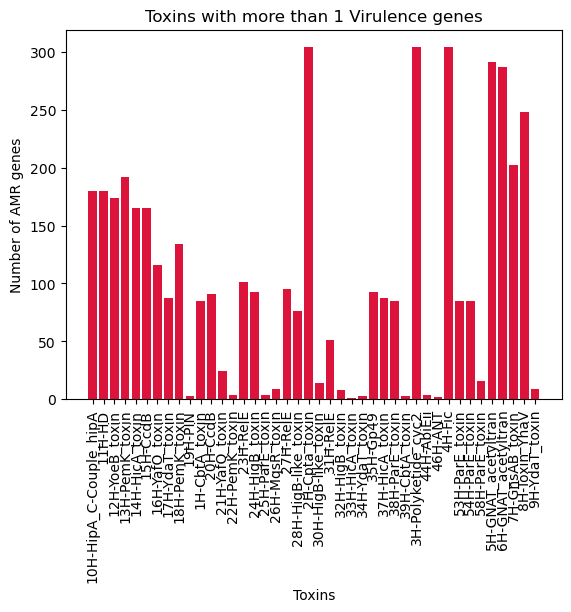

In [18]:
# Define your threshold
threshold = 1

# Create a pandas series from the dictionary, with AMR genes as values and toxins as indices
vf_series = pd.Series(co_occurrence_dict).explode()

# Count the number of AMR genes for each toxin
toxin_counts = vf_series.groupby(level=0).count()

# Filter the counts based on your threshold
toxin_counts_filtered = toxin_counts[toxin_counts >=threshold]

# Plot the barplot
plt.bar(toxin_counts_filtered.index, toxin_counts_filtered.values, color = 'crimson')
plt.xlabel('Toxins')
# Rotating X-axis labels
plt.xticks(rotation = 90)
plt.ylabel('Number of AMR genes')
plt.title(f'Toxins with more than {threshold} Virulence genes')
plt.show()